In [10]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [12]:
img = cv2.imread('./sorted_image_list/normal_bladder/nb_1.jpg')
img.shape

(558, 807, 3)

In [13]:
path_to_data = "./sorted_image_list/"
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['./sorted_image_list/normal_bladder',
 './sorted_image_list/overactive_bladder']

In [14]:
bladder_dict = {}
for img_dir in img_dirs:
    bladder_type = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    bladder_dict[bladder_type] = file_list
bladder_dict

{'normal_bladder': ['./sorted_image_list/normal_bladder\\nb_1.jpg',
  './sorted_image_list/normal_bladder\\nb_10.jpg',
  './sorted_image_list/normal_bladder\\nb_11.jpg',
  './sorted_image_list/normal_bladder\\nb_12.jpg',
  './sorted_image_list/normal_bladder\\nb_13.jpg',
  './sorted_image_list/normal_bladder\\nb_14.jpg',
  './sorted_image_list/normal_bladder\\nb_15.jpg',
  './sorted_image_list/normal_bladder\\nb_16.jpg',
  './sorted_image_list/normal_bladder\\nb_17.jpg',
  './sorted_image_list/normal_bladder\\nb_18.jpg',
  './sorted_image_list/normal_bladder\\nb_19.jpg',
  './sorted_image_list/normal_bladder\\nb_2.jpg',
  './sorted_image_list/normal_bladder\\nb_20.jpg',
  './sorted_image_list/normal_bladder\\nb_21.jpg',
  './sorted_image_list/normal_bladder\\nb_22.jpg',
  './sorted_image_list/normal_bladder\\nb_3.jpg',
  './sorted_image_list/normal_bladder\\nb_4.jpg',
  './sorted_image_list/normal_bladder\\nb_5.jpg',
  './sorted_image_list/normal_bladder\\nb_6.jpg',
  './sorted_image_l

In [15]:
class_dict = {}
count = 0
for bladder_type in bladder_dict.keys():
    class_dict[bladder_type] = count
    count = count + 1
class_dict

{'normal_bladder': 0, 'overactive_bladder': 1}

In [42]:
X, y = [], []
for bladder_type, training_files in bladder_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        resized_img = cv2.resize(img, (128, 128))        
        resized_img = resized_img/255.0
        X.append(resized_img)
        y.append(class_dict[bladder_type])

In [43]:
len(X)

44

In [44]:
len(y)

44

In [46]:
y[:5]

[0, 0, 0, 0, 0]

In [47]:
len(X[0])

128

In [48]:
X[0].shape

(128, 128, 3)

In [49]:
X[41]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0

In [50]:
128*128*3

49152

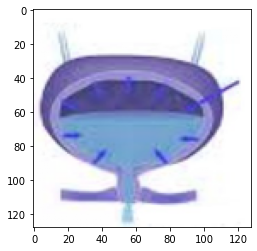

In [51]:
plt.imshow(X[41])

In [52]:
X = np.array(X).reshape(len(X),49152).astype(float)
X.shape

(44, 49152)

In [53]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.45454545454545453

In [56]:
X_train.shape

(33, 49152)

In [57]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         3
           1       1.00      0.25      0.40         8

    accuracy                           0.45        11
   macro avg       0.67      0.62      0.45        11
weighted avg       0.82      0.45      0.43        11



In [58]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [59]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [60]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.604762,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.704762,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.547619,{'logisticregression__C': 1}


In [61]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [64]:
best_estimators['svm'].score(X_test,y_test)

0.36363636363636365

In [65]:
best_estimators['random_forest'].score(X_test,y_test)

0.18181818181818182

In [66]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.36363636363636365

In [67]:
best_clf = best_estimators['svm']

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[2, 1],
       [6, 2]], dtype=int64)

Text(69.0, 0.5, 'Truth')

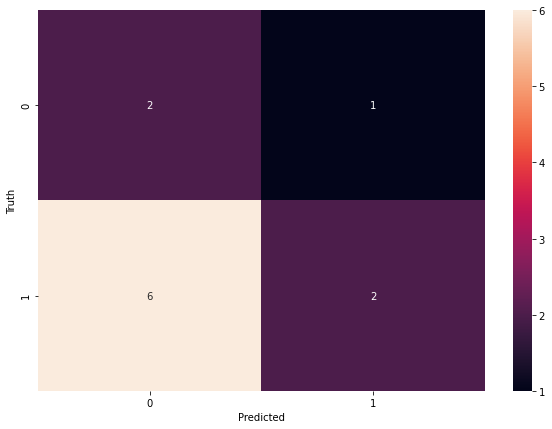

In [69]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [70]:
class_dict

{'normal_bladder': 0, 'overactive_bladder': 1}